In [53]:
%run "All_helper_classes.ipynb" sort=False

#from "Models training helpers.ipynb" we will import 3 helper classes and the associated helper methods.
parsing_helpers = generic_parsing_helpers()
aivm_helper = AIVM_helper()
model_helpers, info = default_model_helpers_for_project()
#if you want to see the paths now can call with...
display (HTML(info))

paths = project_paths()

#same for paths and repo data, display using...
display (HTML(paths.get_paths_data()))
display (HTML(paths.get_repo_data()))



Necessary libraries imported.
Initialised generic_parsing_helpers class and methods
Initialised AIVM_helper class and methods
Initialised model_helpers class and methods


In [116]:
%%javascript
//To remove scroll from any output area and automatically extend the jupyter cell
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
# visualization imports
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import base64
import io
sns.set() 
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, auc, precision_score, roc_curve, confusion_matrix, classification_report
import tqdm


In [29]:
#Read the combined original training data and audited data file from "training_ALL.tsv"
#Note this method already calls "remove_line_breaks"
USE_GIT_HUB = True

print (paths.TRAINING_DATA_ALL_DIR_FILE_GIT)
print (paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL)

#Note this method already calls "remove_line_breaks"
training_df = model_helpers.get_training_data(
                            USE_GIT_HUB,
                            paths.TRAINING_DATA_ALL_DIR_FILE_GIT,
                            paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)

https://raw.githubusercontent.com/aideenf/AIVC/master/cp_wssc/Data/Iterative-models-building/Training%20data/Conventions/training_ALL.tsv
Data/Iterative-models-building/Training data/Conventions/training_ALL.tsv
Initialised generic_parsing_helpers class and methods


In [30]:
training_df.head()

,label,text,provenance,convention
0,1,+ This is an easter egg concerned with the com...,Manually_gathered,civic
1,1,Additionally you can modify SAM to integrate i...,Manually_gathered,civic
2,1,Chrome has the largest share of global usage a...,Manually_gathered,civic
3,1,Kivy is MIT licensed actively developed by a g...,Manually_gathered,civic
4,1,Thanks to our great community we\'ve finally r...,Manually_gathered,civic


In [35]:
#Note this method already processes the gathered data and reads either from local or directly from git.
gathered_conventions_files, gathered_conventions_df = model_helpers.get_aggregated_gathered_data (
                            USE_GIT_HUB,
                            paths.GATHERED_DATA_CONV_DIR_GIT,
                            paths.GATHERED_DATA_CONV_DIR_LOCAL,
                            paths.GITHUB_GATHERED_URL_PATH, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)


Initialised AIVM_helper class and methods


In [36]:
display (gathered_conventions_df.head(5))

,text,provenance
0,react can also render on the server using node...,Github
1,b open source society university path to a fre...,Github
2,the curriculum is designed as follows - intro ...,Github
3,all or nearly all course material prior to pro...,Github
4,"please check our frequently asked questions, a...",Github


In [38]:
column_to_tokenize = 'text'
gathered_and_training = pd.DataFrame(gathered_conventions_df[column_to_tokenize].append(training_df[column_to_tokenize]))##Adding training data sentences
extended_tokenizer = parsing_helpers.create_tokenizer(gathered_and_training, 
                                                        column_to_tokenize,
                                                        max_words=model_helpers.MAX_NB_WORDS)

display (type (extended_tokenizer))

keras_preprocessing.text.Tokenizer

In [39]:
## Vocabulary loading
def _read_glove_embeddings(glove_dir, embedding_dim):
    ## Reading GLOVE (precalculated word embeddings)
    embeddings_index = {}
    f = open(os.path.join(glove_dir, 'glove.6B.{}d.txt'.format(embedding_dim)))
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    return embeddings_index

In [43]:
embeddings_index =_read_glove_embeddings(glove_dir=paths.GLOVE_DIR_LOCAL, embedding_dim=model_helpers.EMBEDDING_DIM)

In [54]:
## Train DL models
"""
N=1
models = []
for i in range(N):
    result = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 
    models.append(result)
    
"""

_DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(training_df,
                data_class_column="convention", 
                data_label_column="label",
                tokenizer=extended_tokenizer,
                random_seed=0,
                use_validation=True) 
                


Found 83027 unique tokens.
----------------------------------------------------------------
            civic                  
----------------------------------------------------------------
Shape of data tensor: (456, 32)
Shape of label tensor: (456, 2)

Number of elements from each class in traing and validation set 
[181. 184.]
[47. 44.]


/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 32, 100)      8302800     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 30, 128)      38528       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 29, 128)      51328       embedding_1[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 32, 100)      8302800     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 30, 128)      38528       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 29, 128)      51328       embedding_2[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 32, 100)      8302800     input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 30, 128)      38528       embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 29, 128)      51328       embedding_3[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 32, 100)      8302800     input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 30, 128)      38528       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 29, 128)      51328       embedding_4[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 32, 100)      8302800     input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 30, 128)      38528       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 29, 128)      51328       embedding_5[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 32, 100)      8302800     input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_21 (Conv1D)              (None, 30, 128)      38528       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_22 (Conv1D)              (None, 29, 128)      51328       embedding_6[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 32, 100)      8302800     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_25 (Conv1D)              (None, 30, 128)      38528       embedding_7[0][0]                
__________________________________________________________________________________________________
conv1d_26 (Conv1D)              (None, 29, 128)      51328       embedding_7[0][0]                
__________________________________

/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/Users/aideenf/.pyenv/versions/3.6.0/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 32, 100)      8302800     input_8[0][0]                    
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 30, 128)      38528       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 29, 128)      51328       embedding_8[0][0]                
__________________________________

# Metrics

Note in terms of the overall system: The EC identification is an imbalanced classification problem: we have 8 labels we need to identify — with one or two labels(industrial, project) representing the overwhelming majority of the data points in our real world "gathered data", ie the rate of some of the conventions in our real world "gathered data" will be very low, therefor accuracy may not be a good measure for assessing model performance.

For example in the "inspired" classifier proclaiming all sentences as negative for "inspired" convention may be highly accurate due to the low overall presence of 'inspired' convention in the data, but it is not helpful. 
Our focus then in terms of performance should maybe be in terms of identifying the positive cases, i.e to maximize the "recall" (number of true positives divided by the number of true positives plus the number of false negatives). However if we were to label all sentences as "inspired" in our "inspired" classifier, even though or recall would go to 1  this model would suffer from low precision(the ability of a classification model to identify only the relevant data points). So ideally we should balance the two.

If we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score(The harmonic mean of precision and recall, harmonic mean is used as it punishes extreme values)


In [334]:
def get_positive_preds_with_threshold(preds, threshold=0.5):

    preds_results = []
    for j in range(len(preds)):
        int_pred = int(preds[j][1]>=threshold)
        
        preds_results.append(int_pred)
    return preds_results


def calculate_metrics(results, num_samples):
    roc = pd.DataFrame(index = results['threshold'], columns=['accuracy', 'recall', 'precision', 'f1', 'tpr', 'fpr'])
    
    for i in results.iterrows():
        
        threshold, tp, fp, tn, fn = i[1]
        assert tp + fp + tn + fn == num_samples 
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        accuracy = (tp+tn)/(tp + fp + tn + fn)
        
        roc.loc[threshold, 'accuracy'] = accuracy
        roc.loc[threshold, 'recall'] = recall
        roc.loc[threshold, 'precision'] = precision
        roc.loc[threshold, 'f1'] = f1
        roc.loc[threshold, 'tpr'] = true_positive_rate
        roc.loc[threshold, 'fpr'] = false_positive_rate
        
    return roc.reset_index()


def calculate_final_models_metrics(results):
    metrics_df = pd.DataFrame(index = results['index'], columns=['convention','accuracy', 'recall', 'precision', 'f1', 'tpr', 'fpr']) 
    for i in results.iterrows():
        index, convention, tp, fp, tn, fn = i[1]  

        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        accuracy = (tp+tn)/(tp + fp + tn + fn)
        

        metrics_df.loc[index, 'convention'] = convention
        metrics_df.loc[index, 'accuracy'] = accuracy
        metrics_df.loc[index, 'recall'] = recall
        metrics_df.loc[index, 'precision'] = precision
        metrics_df.loc[index, 'f1'] = f1
        metrics_df.loc[index, 'tpr'] = true_positive_rate
        metrics_df.loc[index, 'fpr'] = false_positive_rate

    
    metrics_df = pd.concat([results, metrics_df.drop("convention", axis=1)],axis=1, join='inner', sort = False)

    return metrics_df

def apply_pred_threshold(preds, t):
    res = np.zeros(len(preds))  
    res[preds>=t] = 1
    return res
    

Metrics for civic per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,44,47,0,0,0.483516,1,0.483516,0.651852,1,1
1,0.1,41,15,32,3,0.802198,0.931818,0.732143,0.82,0.931818,0.319149
2,0.2,41,12,35,3,0.835165,0.931818,0.773585,0.845361,0.931818,0.255319
3,0.3,41,10,37,3,0.857143,0.931818,0.803922,0.863158,0.931818,0.212766
4,0.4,38,7,40,6,0.857143,0.863636,0.844444,0.853933,0.863636,0.148936
5,0.5,38,6,41,6,0.868132,0.863636,0.863636,0.863636,0.863636,0.12766
6,0.6,38,6,41,6,0.868132,0.863636,0.863636,0.863636,0.863636,0.12766
7,0.7,36,6,41,8,0.846154,0.818182,0.857143,0.837209,0.818182,0.12766
8,0.8,34,4,43,10,0.846154,0.772727,0.894737,0.829268,0.772727,0.0851064
9,0.9,29,4,43,15,0.791209,0.659091,0.878788,0.753247,0.659091,0.0851064


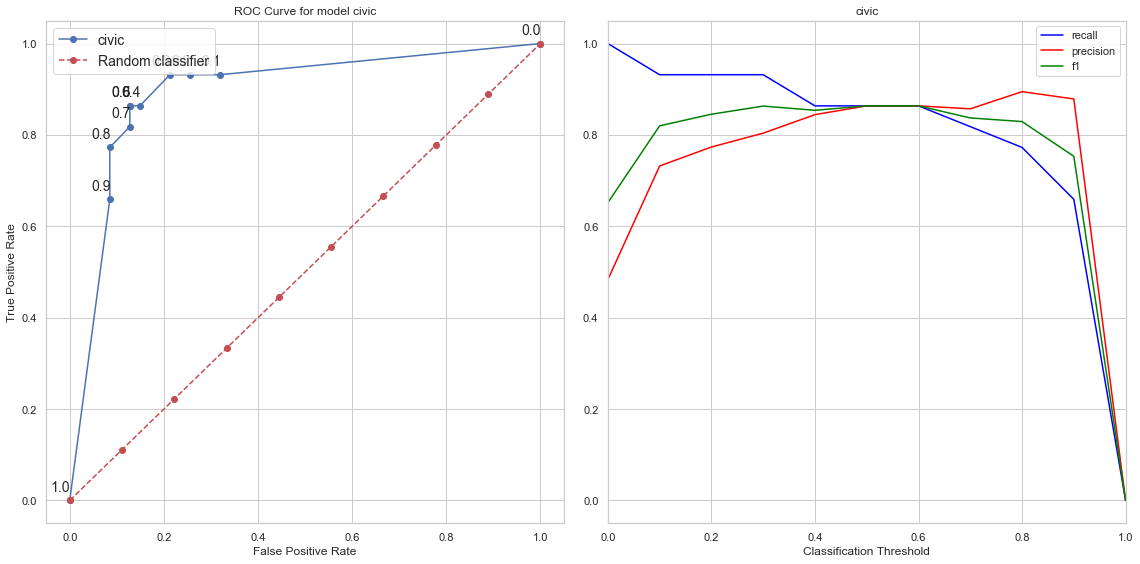

The best of each evaluation metric for model civic
* Precision:  0.8947368421052632 at threshold  0.8
* Recall:  1.0 at threshold  0.0
* F1:  0.8636363636363636 at threshold  0.5



Metrics for domestic per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,33,39,0,0,0.458333,1,0.458333,0.628571,1,1
1,0.1,31,12,27,2,0.805556,0.939394,0.72093,0.815789,0.939394,0.307692
2,0.2,30,11,28,3,0.805556,0.909091,0.731707,0.810811,0.909091,0.282051
3,0.3,30,11,28,3,0.805556,0.909091,0.731707,0.810811,0.909091,0.282051
4,0.4,28,10,29,5,0.791667,0.848485,0.736842,0.788732,0.848485,0.25641
5,0.5,27,9,30,6,0.791667,0.818182,0.75,0.782609,0.818182,0.230769
6,0.6,27,9,30,6,0.791667,0.818182,0.75,0.782609,0.818182,0.230769
7,0.7,26,7,32,7,0.805556,0.787879,0.787879,0.787879,0.787879,0.179487
8,0.8,25,6,33,8,0.805556,0.757576,0.806452,0.78125,0.757576,0.153846
9,0.9,22,6,33,11,0.763889,0.666667,0.785714,0.721311,0.666667,0.153846


<Figure size 432x288 with 0 Axes>

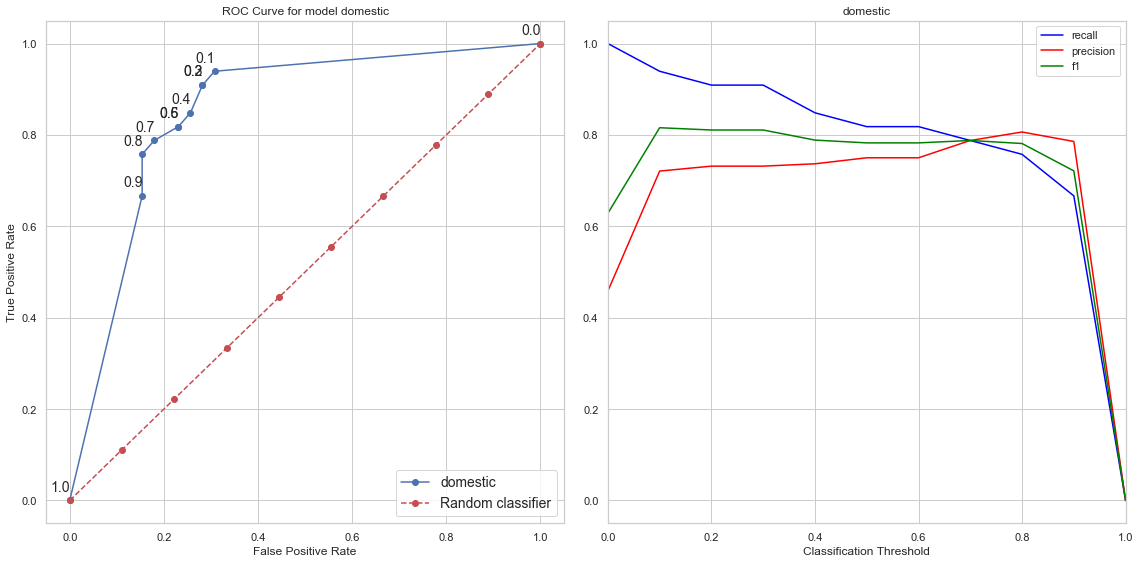

The best of each evaluation metric for model domestic
* Precision:  0.8064516129032258 at threshold  0.8
* Recall:  1.0 at threshold  0.0
* F1:  0.8157894736842105 at threshold  0.1



Metrics for green per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,159,154,0,0,0.507987,1,0.507987,0.673729,1,1
1,0.1,148,6,148,11,0.945687,0.930818,0.961039,0.945687,0.930818,0.038961
2,0.2,147,6,148,12,0.942492,0.924528,0.960784,0.942308,0.924528,0.038961
3,0.3,147,5,149,12,0.945687,0.924528,0.967105,0.945338,0.924528,0.0324675
4,0.4,146,4,150,13,0.945687,0.918239,0.973333,0.944984,0.918239,0.025974
5,0.5,146,4,150,13,0.945687,0.918239,0.973333,0.944984,0.918239,0.025974
6,0.6,145,4,150,14,0.942492,0.91195,0.973154,0.941558,0.91195,0.025974
7,0.7,145,3,151,14,0.945687,0.91195,0.97973,0.944625,0.91195,0.0194805
8,0.8,145,3,151,14,0.945687,0.91195,0.97973,0.944625,0.91195,0.0194805
9,0.9,145,3,151,14,0.945687,0.91195,0.97973,0.944625,0.91195,0.0194805


<Figure size 432x288 with 0 Axes>

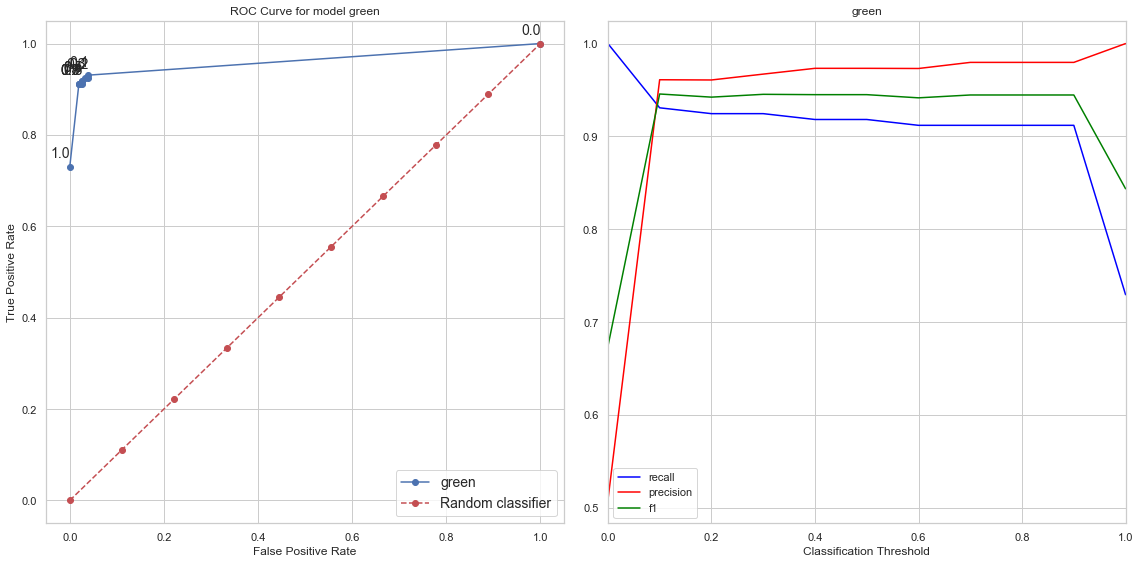

The best of each evaluation metric for model green
* Precision:  1.0 at threshold  1.0
* Recall:  1.0 at threshold  0.0
* F1:  0.9456869009584665 at threshold  0.1



Metrics for industrial per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,125,134,0,0,0.482625,1,0.482625,0.651042,1,1
1,0.1,116,31,103,9,0.84556,0.928,0.789116,0.852941,0.928,0.231343
2,0.2,115,26,108,10,0.861004,0.92,0.815603,0.864662,0.92,0.19403
3,0.3,112,23,111,13,0.861004,0.896,0.82963,0.861538,0.896,0.171642
4,0.4,110,22,112,15,0.857143,0.88,0.833333,0.856031,0.88,0.164179
5,0.5,108,21,113,17,0.853282,0.864,0.837209,0.850394,0.864,0.156716
6,0.6,106,21,113,19,0.84556,0.848,0.834646,0.84127,0.848,0.156716
7,0.7,104,20,114,21,0.841699,0.832,0.83871,0.835341,0.832,0.149254
8,0.8,101,17,117,24,0.841699,0.808,0.855932,0.831276,0.808,0.126866
9,0.9,97,14,120,28,0.837838,0.776,0.873874,0.822034,0.776,0.104478


<Figure size 432x288 with 0 Axes>

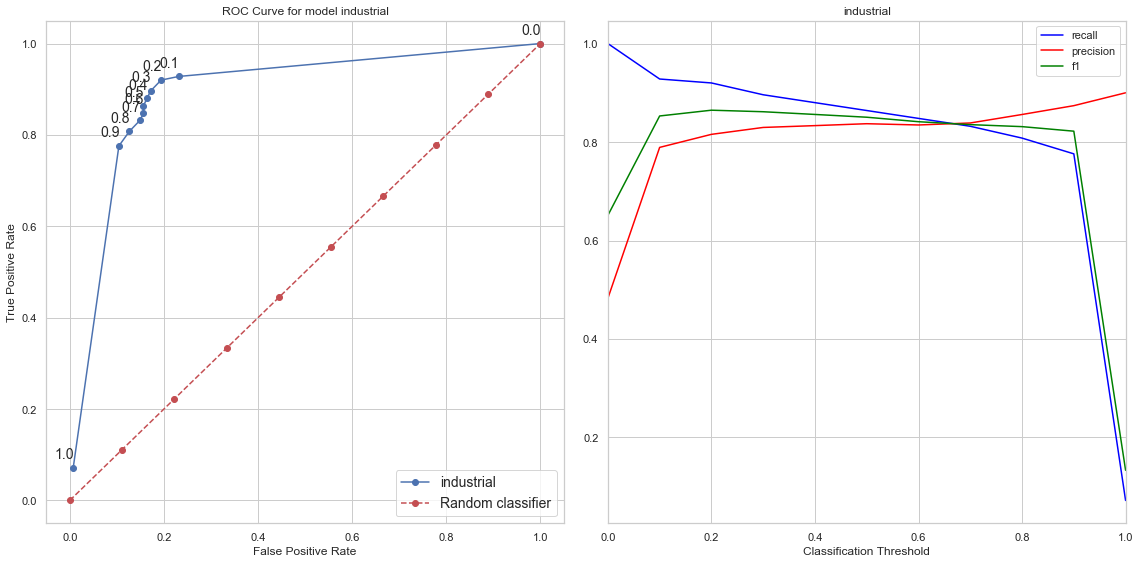

The best of each evaluation metric for model industrial
* Precision:  0.9 at threshold  1.0
* Recall:  1.0 at threshold  0.0
* F1:  0.8646616541353384 at threshold  0.2



Metrics for inspired per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,29,36,0,0,0.446154,1,0.446154,0.617021,1,1
1,0.1,29,25,11,0,0.615385,1,0.537037,0.698795,1,0.694444
2,0.2,26,22,14,3,0.615385,0.896552,0.541667,0.675325,0.896552,0.611111
3,0.3,26,20,16,3,0.646154,0.896552,0.565217,0.693333,0.896552,0.555556
4,0.4,23,17,19,6,0.646154,0.793103,0.575,0.666667,0.793103,0.472222
5,0.5,22,13,23,7,0.692308,0.758621,0.628571,0.6875,0.758621,0.361111
6,0.6,21,11,25,8,0.707692,0.724138,0.65625,0.688525,0.724138,0.305556
7,0.7,21,10,26,8,0.723077,0.724138,0.677419,0.7,0.724138,0.277778
8,0.8,19,10,26,10,0.692308,0.655172,0.655172,0.655172,0.655172,0.277778
9,0.9,18,8,28,11,0.707692,0.62069,0.692308,0.654545,0.62069,0.222222


<Figure size 432x288 with 0 Axes>

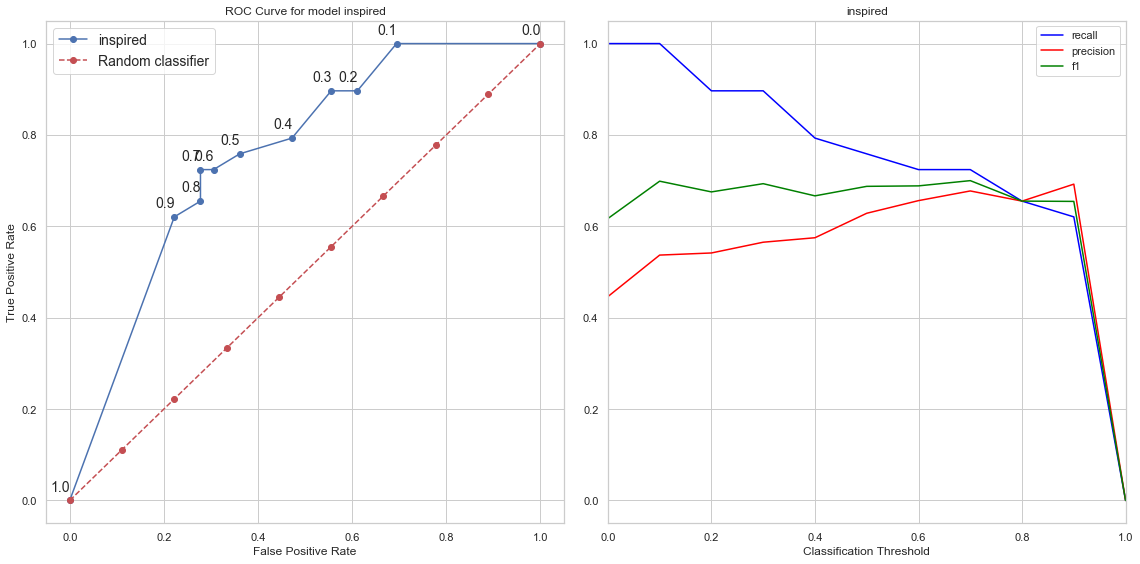

The best of each evaluation metric for model inspired
* Precision:  0.6923076923076923 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.7 at threshold  0.7



Metrics for market per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,54,56,0,0,0.490909,1,0.490909,0.658537,1,1
1,0.1,52,26,30,2,0.745455,0.962963,0.666667,0.787879,0.962963,0.464286
2,0.2,46,23,33,8,0.718182,0.851852,0.666667,0.747967,0.851852,0.410714
3,0.3,44,17,39,10,0.754545,0.814815,0.721311,0.765217,0.814815,0.303571
4,0.4,42,16,40,12,0.745455,0.777778,0.724138,0.75,0.777778,0.285714
5,0.5,42,10,46,12,0.8,0.777778,0.807692,0.792453,0.777778,0.178571
6,0.6,40,8,48,14,0.8,0.740741,0.833333,0.784314,0.740741,0.142857
7,0.7,38,7,49,16,0.790909,0.703704,0.844444,0.767677,0.703704,0.125
8,0.8,36,3,53,18,0.809091,0.666667,0.923077,0.774194,0.666667,0.0535714
9,0.9,33,1,55,21,0.8,0.611111,0.970588,0.75,0.611111,0.0178571


<Figure size 432x288 with 0 Axes>

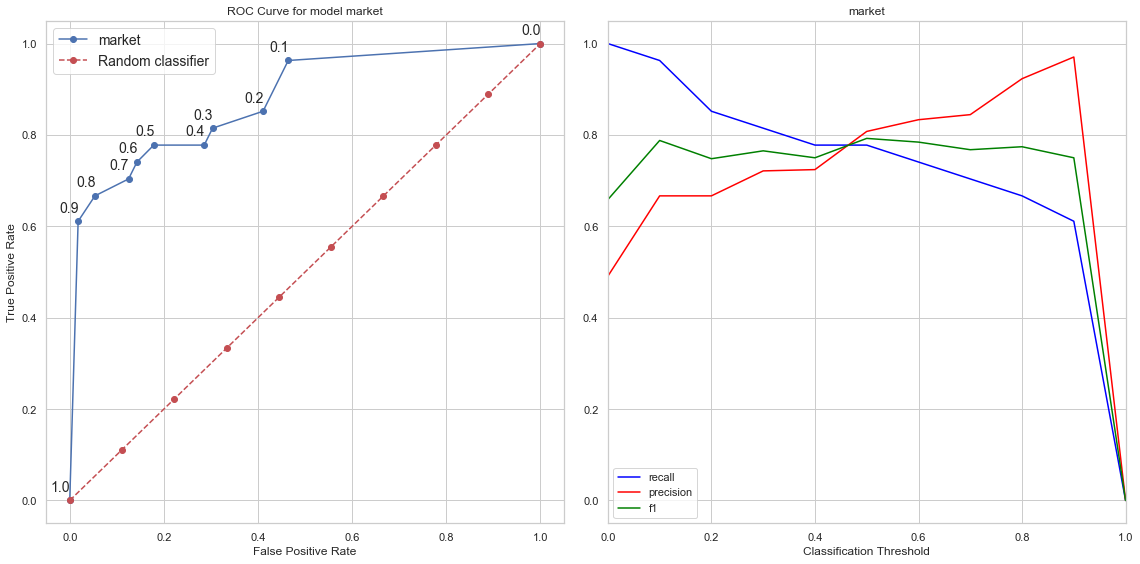

The best of each evaluation metric for model market
* Precision:  0.9705882352941176 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.7924528301886792 at threshold  0.5



Metrics for project per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,70,56,0,0,0.555556,1,0.555556,0.714286,1,1
1,0.1,67,20,36,3,0.81746,0.957143,0.770115,0.853503,0.957143,0.357143
2,0.2,65,17,39,5,0.825397,0.928571,0.792683,0.855263,0.928571,0.303571
3,0.3,64,17,39,6,0.81746,0.914286,0.790123,0.847682,0.914286,0.303571
4,0.4,64,14,42,6,0.84127,0.914286,0.820513,0.864865,0.914286,0.25
5,0.5,63,14,42,7,0.833333,0.9,0.818182,0.857143,0.9,0.25
6,0.6,60,14,42,10,0.809524,0.857143,0.810811,0.833333,0.857143,0.25
7,0.7,59,10,46,11,0.833333,0.842857,0.855072,0.848921,0.842857,0.178571
8,0.8,56,10,46,14,0.809524,0.8,0.848485,0.823529,0.8,0.178571
9,0.9,54,9,47,16,0.801587,0.771429,0.857143,0.81203,0.771429,0.160714


<Figure size 432x288 with 0 Axes>

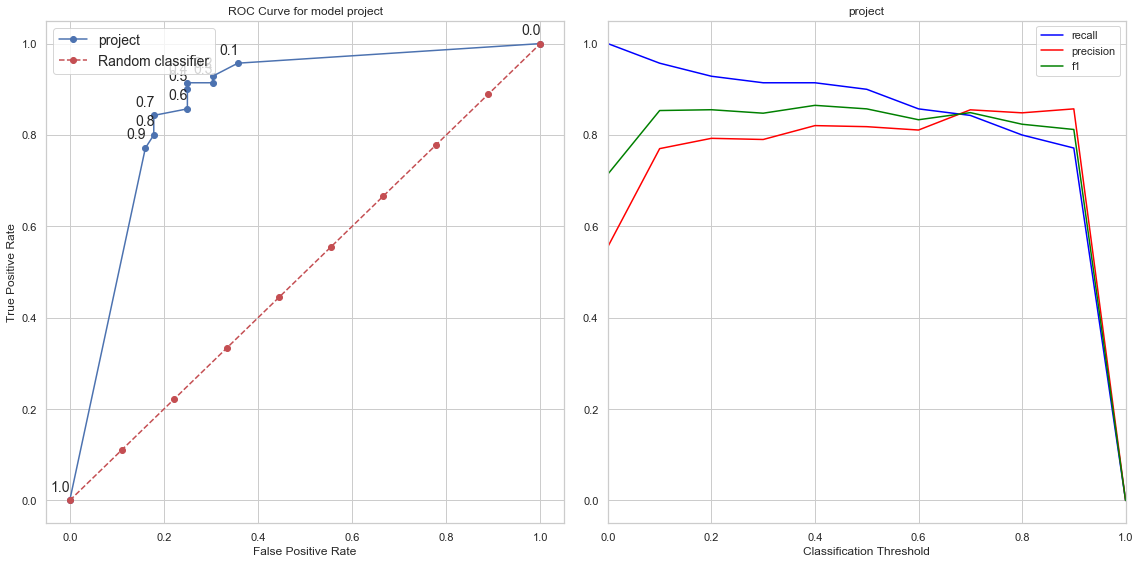

The best of each evaluation metric for model project
* Precision:  0.8571428571428571 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8648648648648648 at threshold  0.4



Metrics for renown per Classification Threshold


,threshold,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0.0,29,31,0,0,0.483333,1,0.483333,0.651685,1,1
1,0.1,28,18,13,1,0.683333,0.965517,0.608696,0.746667,0.965517,0.580645
2,0.2,27,17,14,2,0.683333,0.931034,0.613636,0.739726,0.931034,0.548387
3,0.3,27,13,18,2,0.75,0.931034,0.675,0.782609,0.931034,0.419355
4,0.4,27,11,20,2,0.783333,0.931034,0.710526,0.80597,0.931034,0.354839
5,0.5,27,7,24,2,0.85,0.931034,0.794118,0.857143,0.931034,0.225806
6,0.6,26,7,24,3,0.833333,0.896552,0.787879,0.83871,0.896552,0.225806
7,0.7,24,6,25,5,0.816667,0.827586,0.8,0.813559,0.827586,0.193548
8,0.8,19,4,27,10,0.766667,0.655172,0.826087,0.730769,0.655172,0.129032
9,0.9,16,1,30,13,0.766667,0.551724,0.941176,0.695652,0.551724,0.0322581


<Figure size 432x288 with 0 Axes>

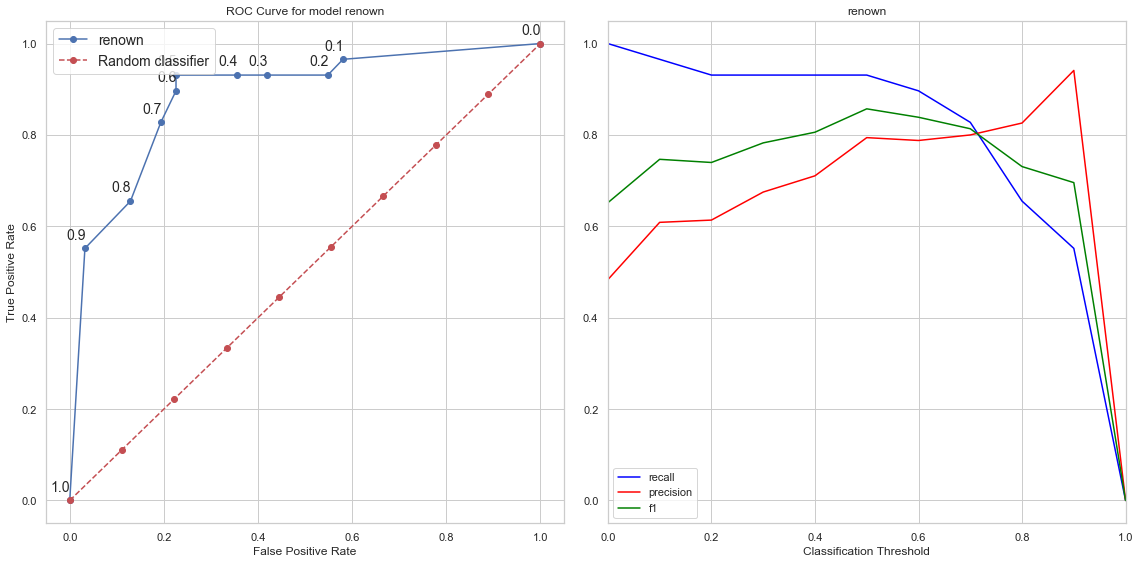

The best of each evaluation metric for model renown
* Precision:  0.9411764705882353 at threshold  0.9
* Recall:  1.0 at threshold  0.0
* F1:  0.8571428571428571 at threshold  0.5

dict_opt_f1_threshold {'civic': 0.5, 'domestic': 0.1, 'green': 0.1, 'industrial': 0.2, 'inspired': 0.7, 'market': 0.5, 'project': 0.4, 'renown': 0.5}
dict_opt_precision_threshold {'civic': 0.8, 'domestic': 0.8, 'green': 1.0, 'industrial': 1.0, 'inspired': 0.9, 'market': 0.9, 'project': 0.9, 'renown': 0.9}
dict_opt_recall_threshold {'civic': 0.0, 'domestic': 0.0, 'green': 0.0, 'industrial': 0.0, 'inspired': 0.0, 'market': 0.0, 'project': 0.0, 'renown': 0.0}


<Figure size 432x288 with 0 Axes>

In [333]:
#Generate a list of 100 possible tresholds between 0 and .96, 
# AF why .96?
#thresholds = np.linspace(0,0.96,100)
#thresholds = np.linspace(0,1,10)

#AF: We could evaluate thresholds from 0.0 to 1.0 in increments of 0.1?
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tn_list = []
fp_list = [] 
fn_list = []
tp_list = []

_conventions_matches_precissions = {}
dict_opt_f1_threshold = {}
dict_opt_precision_threshold = {}
dict_opt_recall_threshold = {}

# AF: at each step calculating the precision, recall, F1, and location on the ROC curve. 
#For each convention
for k in _DLModels.keys():
    tn_list = []
    fp_list = [] 
    fn_list = []
    tp_list = []
    
    tmp_precissions = []
    #get the model, the validation data input(my_data_x) and the predicted label(preds) to compare to the actual label(my_data_y).
    my_model = _DLModels[k]
    my_data_x = _DLData_val_x[k]
    my_data_y = [int(x[0]<x[1]) for x in _DLData_val_y[k]]
    preds = my_model.predict(my_data_x)
    
    for t in thresholds:
        y_pred = get_positive_preds_with_threshold(preds,t)
        tmp_precissions.append(metrics.precision_score(my_data_y, y_pred))
        confusion_matrix = metrics.confusion_matrix(my_data_y, y_pred)
        tn, fp, fn, tp = confusion_matrix.ravel()
        tn_list.append(tn)
        fp_list.append(fp)
        fn_list.append(fn)
        tp_list.append(tp)
    #a dictionary of precisions for each convention(k) for each of the possible tresholds
    _conventions_matches_precissions[k] = tmp_precissions
    print ("")
    display (HTML("<font color = green><h3><left>*** " + k + "***</left></h3></font>"))
    results_for_current_convention = pd.DataFrame({'threshold': thresholds,
                        'tp': tp_list,
                        'fp': fp_list,
                        'tn': tn_list,
                        'fn': fn_list
                       })
   
    roc =  calculate_metrics(results_for_current_convention, len(my_data_y));
    results_for_current_convention = pd.concat([results_for_current_convention, roc.drop("threshold", axis=1)],axis=1, join='inner', sort = False)
    
    print("Metrics for " +k + " per Classification Threshold")
    display(results_for_current_convention)
    
    
    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    plt.style.use('seaborn-dark-palette')
    my_thresholds = [str(t) for t in results_for_current_convention['threshold']]
    plt.plot(roc['fpr'], roc['tpr'], 'bo-', label = k);
    plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'Random classifier');
    for x, y, s in zip(roc['fpr'], roc['tpr'], my_thresholds):
        plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});
    plt.legend(prop={'size':14})
    plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate');
    plt.title('ROC Curve for model '+k);
    #plt.show()
    #plt.clf()
    
    plt.subplot(1, 2, 2)
    ax = plt.gca()
    plt.title(k)
    roc.plot(kind='line',x='threshold',y='recall', color='blue',ax=ax)
    roc.plot(kind='line',x='threshold',y='precision', color='red', ax=ax)
    roc.plot(kind='line',x='threshold',y='f1', color='green', ax=ax)
    plt.xlabel('Classification Threshold')
    plt.tight_layout()
    plt.show()
    plt.clf()
    print ("The best of each evaluation metric for model", k)

    best = results_for_current_convention[['recall','precision', 'f1']].max()
    try:
        best_precision_threshold = results_for_current_convention[['threshold']][results_for_current_convention.precision == best[1]]['threshold'].iloc[0]
    except:
        best_precision_threshold = results_for_current_convention[['threshold']][results_for_current_convention.precision == best[1]]['threshold'].iloc[0] 
    
    try:
         best_recall_threshold = results_for_current_convention[['threshold']][results_for_current_convention.recall == best[0]]['threshold'].iloc[0]     
    except:
        best_recall_threshold = results_for_current_convention[['threshold']][results_for_current_convention.recall == best[0]]['threshold'].iloc[0] 
    
    try:
        best_F1_threshold = results_for_current_convention[['threshold']][results_for_current_convention.f1 == best[2]]['threshold'].iloc[0] 
    except:
         best_F1_threshold = results_for_current_convention[['threshold']][results_for_current_convention.f1 == best[2]]['threshold'].iloc[0] 
   
    dict_opt_f1_threshold[k] = best_F1_threshold
    dict_opt_precision_threshold[k] = best_precision_threshold
    dict_opt_recall_threshold[k]  =  best_recall_threshold
    print ("* Precision: ", best [1], "at threshold ", best_precision_threshold)
    print ("* Recall: ", best [0], "at threshold ", best_recall_threshold)
    print ("* F1: ", best [2], "at threshold ", best_F1_threshold)

gc.collect()

print ("")
print ("dict_opt_f1_threshold", dict_opt_f1_threshold)
print ("dict_opt_precision_threshold", dict_opt_precision_threshold)
print ("dict_opt_recall_threshold", dict_opt_recall_threshold)


# Now use the optimal F1 thresholds to obtain the metrics for the final models
to get the predictions for each model with optimal F1 classification threshold set.

In [335]:
result_for_all_conventions = pd.DataFrame(columns=['convention','tp','fp','tn','fn'])
count = 0
for k in _DLModels.keys():
    print (k)
    tn_dict = {}
    fp_dict = {} 
    fn_dict = {}
    tp_dict = {}
    
    my_model = _DLModels[k]
    my_data_x = _DLData_val_x[k]
    my_data_y = [int(x[0]<x[1]) for x in _DLData_val_y[k]]
    preds = my_model.predict(my_data_x)
    model_threshold = dict_opt_f1_threshold[k]

    y_pred = get_positive_preds_with_threshold(preds,model_threshold)
    confusion_matrix = metrics.confusion_matrix(my_data_y, y_pred)
    print(metrics.classification_report(my_data_y, y_pred, digits=3))
    tn, fp, fn, tp = confusion_matrix.ravel()
    
    tn_dict[k] = tn
    fp_dict[k] = fp
    fn_dict[k] = fn
    tp_dict[k] = tp
    #a selection of metrics  in dictionary format for each convention(k) 
    result_df = pd.DataFrame({'convention': k,
                              'tp': tp,
                              'fp': fp,
                              'tn': tn,
                              'fn': fn },index=[count])
    result_for_all_conventions = pd.concat([result_for_all_conventions,result_df])
    count = count+1
result_for_all_conventions = result_for_all_conventions.reset_index(drop=False)
final_models_metrics = calculate_final_models_metrics(result_for_all_conventions)
display (HTML("<font color = green><h3><left>Evaluation Metrics summary per model</left></h3></font>"))
display("Using Probability/Classification Threshold based on F1 optimization", dict_opt_f1_threshold)
display (final_models_metrics)
gc.collect()


civic
              precision    recall  f1-score   support

           0      0.872     0.872     0.872        47
           1      0.864     0.864     0.864        44

    accuracy                          0.868        91
   macro avg      0.868     0.868     0.868        91
weighted avg      0.868     0.868     0.868        91

domestic
              precision    recall  f1-score   support

           0      0.931     0.692     0.794        39
           1      0.721     0.939     0.816        33

    accuracy                          0.806        72
   macro avg      0.826     0.816     0.805        72
weighted avg      0.835     0.806     0.804        72

green
              precision    recall  f1-score   support

           0      0.931     0.961     0.946       154
           1      0.961     0.931     0.946       159

    accuracy                          0.946       313
   macro avg      0.946     0.946     0.946       313
weighted avg      0.946     0.946     0.946       313

'Using Probability/Classification Threshold based on F1 optimization'

{'civic': 0.5,
 'domestic': 0.1,
 'green': 0.1,
 'industrial': 0.2,
 'inspired': 0.7,
 'market': 0.5,
 'project': 0.4,
 'renown': 0.5}

,index,convention,tp,fp,tn,fn,accuracy,recall,precision,f1,tpr,fpr
0,0,civic,38,6,41,6,0.868132,0.863636,0.863636,0.863636,0.863636,0.12766
1,1,domestic,31,12,27,2,0.805556,0.939394,0.72093,0.815789,0.939394,0.307692
2,2,green,148,6,148,11,0.945687,0.930818,0.961039,0.945687,0.930818,0.038961
3,3,industrial,115,26,108,10,0.861004,0.92,0.815603,0.864662,0.92,0.19403
4,4,inspired,21,10,26,8,0.723077,0.724138,0.677419,0.7,0.724138,0.277778
5,5,market,42,10,46,12,0.8,0.777778,0.807692,0.792453,0.777778,0.178571
6,6,project,64,14,42,6,0.84127,0.914286,0.820513,0.864865,0.914286,0.25
7,7,renown,27,7,24,2,0.85,0.931034,0.794118,0.857143,0.931034,0.225806


409

# Evaluation Metrics for over all asystem
in multi-label classification, a misclassification is no longer a hard wrong or right. 
A prediction containing a subset of the actual classes should be considered 
better than a prediction that contains none of them, i.e., predicting two 
of the three labels correctly is better than predicting no labels at all. The following metrics can be used
   * Micro-averaging & Macro-averaging (Label based measures):
   * Hamming-Loss (Example based measure):
   * Exact Match Ratio (Subset accuracy):

In [ ]:
print(metrics.classification_report(my_data_y, y_pred, digits=3))

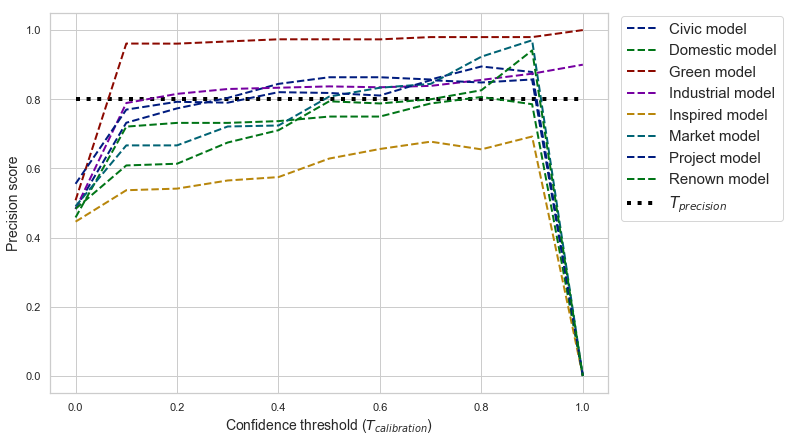

'Classifier Thresholds:'

{'civic': 0.3,
 'domestic': 0.8,
 'green': 0.1,
 'industrial': 0.2,
 'market': 0.5,
 'project': 0.4,
 'renown': 0.8}

<Figure size 432x288 with 0 Axes>

In [322]:
#Plot the precision v's the classification treshold.

plt.figure(figsize=(10,7))

precissions_threshold = 0.8
classifier_thresholds = {}

for k in _conventions_matches_precissions:
    x = thresholds
    y = np.array(_conventions_matches_precissions[k])
  
    plt.plot(x,y, marker='', linewidth=2, linestyle='dashed', label=k.replace("training_", "").replace(".txt", "").capitalize()+" model")
    
    t_index=None
    try:
        t_index = np.argwhere(y > precissions_threshold)[0]
    except:
        pass    
    if t_index is not None:
        classifier_thresholds[k] = x[t_index[0]]
        #plt.plot(x[t_index], y[t_index], 'bo')

#plt.title("Comparing precission scores for all classifiers", fontdict={'fontsize':20}, pad=25)
plt.xlabel("Confidence threshold ($T_{calibration}$)", fontsize=14)
plt.ylabel("Precision score", fontsize=14)
plt.hlines(y=precissions_threshold, xmin=0, xmax=1.00001, color='black', linestyle=":", lw=4, label="$T_{precision}$")

"""plt.legend([x.replace("training_", "").replace(".txt", "")+" model"
            for x in list(_conventions_matches_precissions.keys())], fontsize=15)
"""

plt.legend(fontsize=15, bbox_to_anchor=(1.01, 1.01))

plt.show()
plt.clf()
gc.collect()
display("Classifier Thresholds:", classifier_thresholds)

# https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
# AF:  whert is the equalized_precisions_threshold set?

In [221]:
k = "green"
model = _DLModels[k]
x_val = _DLData_val_x[k]
y_val = _DLData_val_y[k][:,1]
threshold = dict_opt_f1_threshold[k]

pred = model.predict(x_val)[:,1]
y_pred = apply_pred_threshold(pred, threshold)

roc_auc_score(y_val, y_pred)


0.945928285550927

In [71]:
def train_models_and_get_scores(df, t_calibration, N_executions=1):
    accs = {}
    precs = {}
    AUCs = {}
    for i in tqdm.tqdm(range(N_executions)):
    
        _DLModels, _DLTokenizers, _DLData_val_x, _DLData_val_y, _DLTrain_histories = model_helpers.train_DL_models(df,
                    data_class_column="convention", 
                    data_label_column="label",
                    tokenizer=extended_tokenizer,
                    random_seed=0,
                    use_validation=True) 

        for k in _DLModels.keys():
            model = _DLModels[k]
            x_val = _DLData_val_x[k]
            y_val = _DLData_val_y[k][:,1]

            pred = model.predict(x_val)[:,1]
            y_pred = apply_pred_threshold(pred, t_calibration)



            if k in accs:
                accs[k].append(accuracy_score(y_val, y_pred))
                precs[k].append(precision_score(y_val, y_pred))
                AUCs[k].append(roc_auc_score(y_val, y_pred))
            else:
                accs[k] = [accuracy_score(y_val, y_pred)]
                precs[k] = [precision_score(y_val, y_pred)]
                AUCs[k] = [roc_auc_score(y_val, y_pred)]
        
    return accs, precs, AUCs
    

In [72]:
accs, precs, AUCs = train_models_and_get_scores(training_df, equalized_precisions_threshold)

  0%|          | 0/1 [00:00<?, ?it/s]

Found 83025 unique tokens.
----------------------------------------------------------------
            domestic                  
----------------------------------------------------------------
Shape of data tensor: (364, 32)
Shape of label tensor: (364, 2)

Number of elements from each class in traing and validation set 
[144. 148.]
[38. 34.]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_69"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_69 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_69 (Embedding)        (None, 32, 100)      8302600     input_69[0][0]                   
__________________________________________________________________________________________________
conv1d_273 (Conv1D)             (None, 30, 128)      38528       embedding_69[0][0]               
__________________________________________________________________________________________________
conv1d_274 (Conv1D)             (None, 29, 128)      51328       embedding_69[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_70"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_70 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_70 (Embedding)        (None, 32, 100)      8302600     input_70[0][0]                   
__________________________________________________________________________________________________
conv1d_277 (Conv1D)             (None, 30, 128)      38528       embedding_70[0][0]               
__________________________________________________________________________________________________
conv1d_278 (Conv1D)             (None, 29, 128)      51328       embedding_70[0][0]               
_________________________________

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=3)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=4)`
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=128, kernel_size=5)`


model fitting - more complex convolutional neural network
Model: "model_71"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_71 (InputLayer)           (None, 32)           0                                            
__________________________________________________________________________________________________
embedding_71 (Embedding)        (None, 32, 100)      8302600     input_71[0][0]                   
__________________________________________________________________________________________________
conv1d_281 (Conv1D)             (None, 30, 128)      38528       embedding_71[0][0]               
__________________________________________________________________________________________________
conv1d_282 (Conv1D)             (None, 29, 128)      51328       embedding_71[0][0]               
_________________________________

KeyboardInterrupt: 

In [ ]:
print("Models performance on unseen data:\n\n")
custom_ordered_keys = ["industrial", "project", "market", "inspired", "civic", "domestic", "green", "renown"]
for k in custom_ordered_keys:
    avg_acc = "%.3f" % np.mean(accs[k])
    avg_auc = "%.3f" % np.mean(AUCs[k])
    avg_prec = "%.3f" % np.mean(precs[k])
    
    print("{} & {}  & {} & {}\\".format(k, avg_acc, avg_prec, avg_auc))
    print("\hline")
  

In [145]:
def compute_confusions(conv, models_, training_x, training_y, calibration_threshold=0.656):
    matches = [0] * len(classifier_thresholds.keys())
    
    #print(training_y[conv][:,1])
    #print(np.argwhere(training_y[conv][:,1]==1))
    
    sentences = training_x[conv][np.argwhere(training_y[conv][:,1]==1)]
    
    shape = sentences.shape
    sentences = sentences.reshape(shape[0], shape[2])
    sent_length = len(sentences)
    
    
    for idx, k in enumerate(classifier_thresholds.keys()):
        
        print(sentences.shape)
        pred = models_[k].predict(sentences, verbose=0)


        pred = np.array(pred)

        matches[idx] = (pred[pred[:,1]> classifier_thresholds[k]]).sum()
    
        
    return matches, sent_length

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          class_lengths = None):
    
    #print(cm)
    if normalize:
        if class_lengths:
            cm = cm.astype('float') / np.array(class_lengths)[:, np.newaxis]
        else:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass
    print(np.sum(cm[:,1]))
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
        else:
            title = 'Confusion matrix, without normalization \n Accuracy: "%.5f"' % np.mean(cm.diagonal()) 
            
    classes = [c.capitalize() for c in classes]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    ax.set_ylim(cm.shape[0]-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    
    #thresh = 0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    #color=cm[i,j])
                    color="white" if cm[i, j] > thresh else "black")
    
    #fig.tight_layout()
    return ax

In [146]:
y_true = []
y_pred = []

conf_matrix = []
class_lengths = []


for idx, k in enumerate(list(classifier_thresholds.keys())):

    print(" -- {}     ".format(k))


    matches, cl_len = compute_confusions(k, _DLModels, _DLData_val_x, _DLData_val_y)
    
    conf_matrix.append(matches)
    
    class_lengths.append(cl_len)

conf_matrix = np.array(conf_matrix)

 -- domestic     
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
 -- civic     
(46, 32)
(46, 32)
(46, 32)
(46, 32)
(46, 32)
(46, 32)
(46, 32)
 -- project     
(69, 32)
(69, 32)
(69, 32)
(69, 32)
(69, 32)
(69, 32)
(69, 32)
 -- inspired     
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
(34, 32)
 -- green     
(158, 32)
(158, 32)
(158, 32)
(158, 32)
(158, 32)
(158, 32)
(158, 32)
 -- market     
(60, 32)
(60, 32)
(60, 32)
(60, 32)
(60, 32)
(60, 32)
(60, 32)
 -- industrial     
(127, 32)
(127, 32)
(127, 32)
(127, 32)
(127, 32)
(127, 32)
(127, 32)


1.9701788870809875


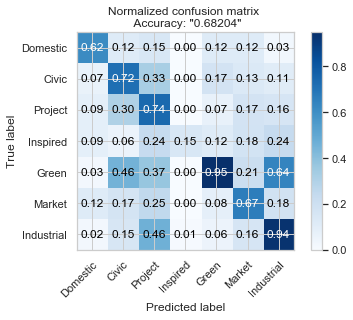

In [147]:
class_names = list(classifier_thresholds.keys())

plot_confusion_matrix(conf_matrix, class_names, normalize=True, class_lengths = class_lengths)

In [91]:
conf_matrix

array([[ 23.,  15.,  18.,   4.,  13.,  12.,  14.,   0.],
       [ 16.,  36.,  24.,   5.,  21.,  17.,  17.,   0.],
       [ 23.,  34.,  56.,  12.,  13.,  17.,  21.,   0.],
       [ 11.,   6.,  17.,   5.,  10.,  13.,  22.,   0.],
       [ 39., 102., 116.,  13., 166.,  75., 174.,   0.],
       [ 10.,  23.,  43.,   6.,  15.,  44.,  37.,   0.],
       [ 54.,  61.,  94.,  14.,  15.,  62., 132.,   0.]])

## Matches histograms

In [114]:
def plot_matches_histogram_multiclass(_matches, _models, title=None, data_sources=[]):

    f, ax = plt.subplots(figsize=[12,6])
    
    elems = [k.replace("training_", "").replace(".txt", "").capitalize()  for k in list(_models.keys())]

    
    barWidth = 0.25  # the width of the bars
    # Set position of bar on X axis
    r1 = np.arange(len(elems))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    rs = [r1,r2,r3]


    
    for m_idx, m in enumerate(_matches):
        f = np.array(m).sum(axis=0)
        f = f / np.sum(f)
        
        print(f)
        print(r1)

        plt.bar(rs[m_idx], f, width=barWidth, edgecolor='white', label=data_sources[m_idx])
        
    # Add xticks on the middle of the group bars
    plt.xlabel('Conventions', fontweight='bold')
    plt.ylabel('Percentage', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(elems))], elems)
    plt.legend()
    plt.show()

In [96]:
def get_model_matches(sequences, model):
    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    preds = model.predict(data)

    return preds

In [77]:
def count_positive_preds(preds):
    count = 0
    for j in range(len(preds)):
    
        count += int(preds[j][1]>preds[j][0])
    return count

In [78]:
def count_positive_preds_with_threshold(preds, threshold=0.5):
    count = 0
    for j in range(len(preds)):
    
        count += int(preds[j][1]>=threshold)
    return count

In [79]:
def calculate_matches(repositories_descriptions, _models, _tokenizers, model_preds_func=count_positive_preds, threshold=None):
    _repos_matches = []

    ##Â Counting number of matches per model for each repo
    for r_description in repositories_descriptions:
        r_description = r_description.split("\n")

        this_repo_matches = []
        for model_key in _models.keys():
            matches=0

            tokenized_r_description = _tokenizers[model_key].texts_to_sequences(r_description)

            preds = get_model_matches(tokenized_r_description, _models[model_key])

            if threshold is None:
                num_matches = model_preds_func(preds)
            else:
                num_matches = model_preds_func(preds, threshold)

            this_repo_matches.append(num_matches)

        _repos_matches.append(this_repo_matches)
        
    return _repos_matches
    

# Analyzing the Github and Semantic Scholar data

In [120]:
AI_repos = pd.read_csv("Data/ToBeAnalyzed/github_AI_repos_dump.csv", sep=";")
not_AI_repos = pd.read_csv("Data/ToBeAnalyzed/github_non_AI_repos_dump.csv")

In [121]:
not_AI_repos.head()

,Unnamed: 0,repo_name,repo_creation_date,repo_last_update,repo_id,repo_language,repo_owner,repo_topics,repo_num_stars,repo_num_subscribers,repo_raw_description,repo_num_forks,repo_num_open_issue,repo_size,cleaned_descriptions,similar_to
0,0,facebook/react,2013-05-24 16:15:54,NaN,10270250,JavaScript,"NamedUser(login=""facebook"")","['javascript', 'react', 'frontend', 'declarati...",136712,6607,b'# [react](https://reactjs.org/) &middot; [![...,25764,796,NaN,b react react is a javascript library for buil...,tensorflow/tensorflow
1,1,ossu/computer-science,2014-05-04 00:18:39,NaN,19415064,NaN,"NamedUser(login=""ossu"")","['computer-science', 'awesome-list', 'courses']",46132,3028,b'![open source society university (ossu)](htt...,6622,29,NaN,b open source society university path to a fre...,keras-team/keras
2,2,jekyll/jekyll,2008-10-20 06:29:03,NaN,65252,Ruby,"NamedUser(login=""jekyll"")","['ruby', 'jekyll', 'static-site-generator', 'b...",38760,1462,b'# [jekyll](https://jekyllrb.com/)\n\n[![gem ...,8462,138,NaN,b jekyll ruby-gems travis appveyor codeclimate...,scikit-learn/scikit-learn
3,3,nodejs/node-v0.x-archive,2009-05-27 16:29:46,NaN,211666,NaN,"NamedUser(login=""nodejs"")",[],35388,2173,b'\nthis repository is an archive of node.js b...,7765,571,NaN,b this repository is an archive of node.js bef...,aymericdamien/TensorFlow-Examples
4,4,vsouza/awesome-ios,2014-07-10 16:03:45,NaN,21700699,Swift,"NamedUser(login=""vsouza"")","['awesome', 'swift-library', 'swift-extensions...",33027,1788,"b'<img src=""https://github.com/vsouza/awesome-...",5563,5,NaN,b abouta curated list of awesome ios framework...,pytorch/pytorch


In [15]:
MAX_SEQUENCE_LENGTH=32

In [123]:
AI_texts = AI_repos['cleaned_descriptions'].values

#AI_texts =[t.split("\n") for t in AI_texts]
AI_repos_matches = calculate_matches(AI_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!



In [124]:
not_AI_texts = not_AI_repos['cleaned_descriptions'].values
not_AI_repos_matches = calculate_matches(not_AI_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!



In [ ]:
S2_texts = []
with open("Data/ToBeAnalyzed/s2_random_3345_nn.txt", "rb") as f:
    S2_texts = f.readlines()
    f.close()
S2_texts = [str(s) for s in S2_texts]
    
S2_matches = calculate_matches(S2_texts, 
                                     models[0][0], 
                                    models[0][1],
                                    model_preds_func=count_positive_preds_with_threshold, 
                                    threshold = 0.656) ##As obtained above!




[0.06951143 0.03326595 0.24418328 0.09338085 0.00307895 0.09783359
 0.3643679  0.09437805]
[0 1 2 3 4 5 6 7]
[0.09722348 0.03550687 0.23687746 0.06382753 0.00152511 0.14390106
 0.32328879 0.09784969]
[0 1 2 3 4 5 6 7]
[0.04166128 0.0663734  0.20494242 0.05873981 0.03118127 0.04217881
 0.37068185 0.18424117]
[0 1 2 3 4 5 6 7]


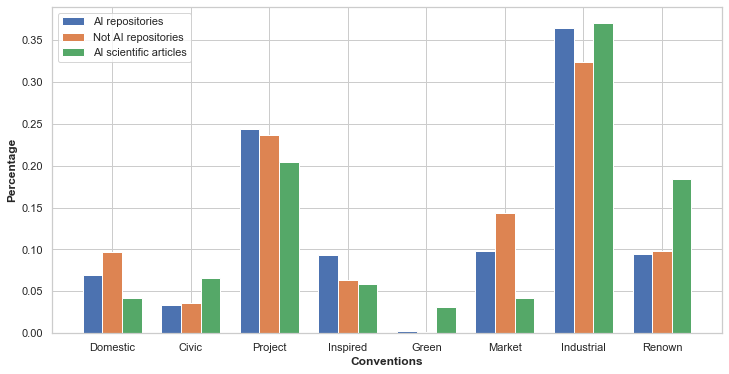

In [277]:
data_sources = ['AI repositories', 'Not AI repositories', 'AI scientific articles']
plot_matches_histogram_multiclass([AI_repos_matches, not_AI_repos_matches, S2_matches], models[0][0], "Conventions for not AI research articles", data_sources)

In [126]:
print(len(AI_repos))
print(len(not_AI_repos))okay

8609
5358


In [135]:
ai_sents = []
for t in AI_repos['cleaned_descriptions'].values:
    for term in t.split("\n"):
        ai_sents.append(str(term))
len(ai_sents)

138085

In [136]:
not_ai_sents = []
for t in not_AI_repos['cleaned_descriptions'].values:
    for term in t.split("\n"):
        not_ai_sents.append(str(term))
len(not_ai_sents)

76274

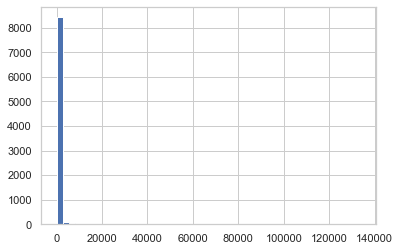

In [141]:
AI_repos['repo_num_stars'].hist(bins=50)

In [142]:
np.mean(AI_repos['repo_num_stars'])

271.43489371587873

In [145]:
np.mean(not_AI_repos['repo_num_stars'])

453.5194102276969

In [143]:
np.max(AI_repos['repo_num_stars'])

133935

In [144]:
np.mean(AI_repos['repo_num_stars'])

271.43489371587873

In [147]:
AI_repos.head()

,repo_name,repo_creation_date,repo_last_update,repo_id,repo_language,repo_owner,repo_topics,repo_num_stars,repo_num_subscribers,repo_raw_description,repo_num_forks,repo_num_open_issue,repo_size,cleaned_descriptions
0,tensorflow/tensorflow,2015-11-07 01:19:20,2015-11-07 01:19:20,45717250,C++,"NamedUser(login=""tensorflow"")","['tensorflow', 'machine-learning', 'python', '...",133935,8585,"b'<div align=""center"">\n <img src=""https://ww...",77239,2672,398370,b documentation tensorflow is an end-to-end o...
1,keras-team/keras,2015-03-28 00:35:42,2015-03-28 00:35:42,33015583,Python,"NamedUser(login=""keras-team"")","['deep-learning', 'tensorflow', 'neural-networ...",44041,2065,b'\xef\xbb\xbf# keras: deep learning for human...,16755,2538,13239,b keras deep learning for humans you have just...
2,scikit-learn/scikit-learn,2010-08-17 09:43:38,2010-08-17 09:43:38,843222,Python,"NamedUser(login=""scikit-learn"")","['machine-learning', 'python', 'statistics', '...",36964,2270,b'.. -*- mode: rst -*-\n\n|azure|_ |travis|_ |...,18180,1939,107837,b .. mode rst azure travis codecov circleci ...
3,aymericdamien/TensorFlow-Examples,2015-11-11 14:21:19,2015-11-11 14:21:19,45986162,Jupyter Notebook,"NamedUser(login=""aymericdamien"")","['tensorflow', 'tutorial', 'examples', 'deep-l...",33929,2054,b'# tensorflow examples\n\nthis tutorial was d...,12813,180,9552,b tensorflow examplesthis tutorial was designe...
4,pytorch/pytorch,2016-08-13 05:26:41,2016-08-13 05:26:41,65600975,C++,"NamedUser(login=""pytorch"")","['neural-network', 'autograd', 'gpu', 'numpy',...",31533,1325,b'![pytorch logo](https://github.com/pytorch/p...,7758,4090,205280,b pytorch is a python package that provides tw...


In [149]:
AI_repos['repo_language'].mode()

0    Python
dtype: object

In [150]:
not_AI_repos['repo_language'].mode()

0    JavaScript
dtype: object

In [153]:
len(AI_repos[AI_repos['repo_language'] == 'Python']) / len(AI_repos)

0.3897084446509467

In [152]:
len(not_AI_repos[not_AI_repos['repo_language'] == 'JavaScript']) / len(not_AI_repos)

0.255692422545726

# Get a list of keywords per convention from the Training data

In [337]:
#Read the combined original training data and audited data file from "training_ALL.tsv"
#Note this method already calls "remove_line_breaks"
USE_GIT_HUB = True

print (paths.TRAINING_DATA_ALL_DIR_FILE_GIT)
print (paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL)

#Note this method already calls "remove_line_breaks"
training_df = model_helpers.get_training_data(
                            USE_GIT_HUB,
                            paths.TRAINING_DATA_ALL_DIR_FILE_GIT,
                            paths.TRAINING_DATA_ALL_DIR_FILE_LOCAL, 
                            paths.GIT_OWNER,
                            paths.GIT_REPO)

display (training_df.head())

for c in training_df['convention'].unique():
    print(c)
    print("number of sentences", len(training_df[training_df['convention'] == c]))
    print("number of sentences in class 1",len(training_df[ (training_df['convention'] == c) & (training_df['label'] == 1)]))
    print()

In [345]:
#AF: to generate the keywords we must use only the data from training data where label = 1
custom_ordered_keys = ["industrial", "project", "market", "inspired", "civic", "domestic", "green", "renown"]
docs = []

for c in custom_ordered_keys:
    #docs.append("\n".join(list(training_df[training_df['convention'] == c]['text'].values)))
    docs.append("\n".join(list(training_df[ (training_df['convention'] == c) & (training_df['label'] == 1)]['text'].values)))

In [346]:
stopwords = stopwords=parsing_helpers.get_stop_words("Data/Iterative-models-building/Training data/resources/stopwords.txt")

In [365]:
#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(docs)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

MIN_TFIDF_SCORE = 0.05

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10, min_score=MIN_TFIDF_SCORE):
    """get the feature names and tf-idf score of top n items"""
    #use only items with > min score
    sorted_items = [[idx, score] for idx,score in sorted_items if score>=min_score]
    
    #return only top n items
    if len(sorted_items) > topn:
        sorted_items = sorted_items[:topn]
        
    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [367]:
# you only needs to do this once
feature_names=cv.get_feature_names()


# get the document that we want to extract keywords from
for doc_idx, doc in enumerate(docs):
    print("=====================================")
    print("         {}                   ".format(custom_ordered_keys[doc_idx]))
    print("=====================================")
    
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only the top n; n here is 30
    keywords=extract_topn_from_vector(feature_names, sorted_items, 30, MIN_TFIDF_SCORE)
    print(keywords)
          

display (HTML("<font color = green><h3><left>***Top 5 Keywords from training data for paper Results***</left></h3></font>"))
for doc_idx, doc in enumerate(docs):
    print("=====================================")
    print("         {}                   ".format(custom_ordered_keys[doc_idx]))
    print("=====================================")
    

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    
    #Extract the top 5 for the paper Results
    keywords=extract_topn_from_vector(feature_names,sorted_items, 5, MIN_TFIDF_SCORE)
    print(keywords)
       

         industrial                   
{'performance': 0.363, 'standard': 0.216, 'reliable': 0.197, 'tests': 0.18, 'control': 0.163, 'efficiency': 0.153, 'functionality': 0.142, 'benchmark': 0.141, 'output': 0.125, 'benchmarks': 0.118, 'functional': 0.099, 'python': 0.096, 'load': 0.094, 'training': 0.09, 'measure': 0.09, 'running': 0.09, 'learning': 0.09, 'applications': 0.09, 'production': 0.085, 'run': 0.084, 'memory': 0.084, 'function': 0.079, 'software': 0.075, 'set': 0.074, 'functions': 0.072, 'optimization': 0.071, 'system': 0.071, 'scientific': 0.07, 'fast': 0.068, 'progress': 0.066}
         project                   
{'city': 0.313, 'projective': 0.289, 'links': 0.252, 'connections': 0.236, 'projects': 0.192, 'networks': 0.189, 'employability': 0.132, 'activity': 0.128, 'aubrey': 0.12, 'bellenger': 0.108, 'status': 0.107, 'man': 0.102, 'streamlined': 0.084, 'say': 0.084, 'engage': 0.081, 'little': 0.076, 'knows': 0.076, 'condition': 0.076, 'grammar': 0.072, 'connexionist': 0.

         industrial                   
{'performance': 0.363, 'standard': 0.216, 'reliable': 0.197, 'tests': 0.18, 'control': 0.163}
         project                   
{'city': 0.313, 'projective': 0.289, 'links': 0.252, 'connections': 0.236, 'projects': 0.192}
         market                   
{'business': 0.288, 'customized': 0.287, 'goods': 0.216, 'buy': 0.171, 'competition': 0.155}
         inspired                   
{'inspiration': 0.461, 'inspired': 0.159, 'creative': 0.1, 'unconscious': 0.1, 'imaginary': 0.1}
         civic                   
{'community': 0.438, 'collective': 0.379, 'civic': 0.239, 'interests': 0.164, 'chapter': 0.164}
         domestic                   
{'whom': 0.242, 'superiors': 0.216, 'upbringing': 0.177, 'household': 0.177, 'children': 0.171}
         green                   
{'green': 0.752, 'economy': 0.346, 'growth': 0.281, 'development': 0.164, 'carbon': 0.16}
         renown                   
{'opinion': 0.495, 'press': 0.306, 'fame': 0.192, 'au

In [ ]:
keyword_from_social_scientists_dict = {
    'industrial': 
        ['efficiency', 'efficiant', 'performance', 'performances', 'productivity', 'productive', 'output', 'outputs', 'control', 'power', 'functionality', 'functional', 'organisation', 'organisations', 'professional', 'professionals', 'profession', 'professions', 'reliability', 'reliable', 'foreseeability', 'qualification', 'qualifications', 'expert', 'experts', 'expertise', 'progress' , 'standard', 'standards', 'standardized', 'norms', 'norm', 'growth', 'quantification', 'quantifiy', 'measurement', 'measure', 'measures', 'engineering', 'engineer', 'forecast', 'linearity', 'extrapolation', 'extrapolate', 'scientific', 'plans', 'plan', 'audit', 'audits', 'benchmark', 'benchmarks', 'benchmarking', 'test', 'tests'],
    'project':
        ['flexibility', 'project', 'projects', 'networking', 'networker', 'networkers', 'activity', 'intermediary', 'mediation', 'switch', 'switching', 'shift', 'shifting', 'mobility', 'dynamic', 'transition', 'transitions', 'temporality', 'fluidity', 'communication', 'communications', 'communicate', 'initiative', 'initiatives', 'bridging', 'adapt', 'adaption', 'adaptions'],
    'market':
        ['wealth', 'money', 'goods', 'rival', 'selfishness', 'winner', 'winners', 'price', 'customer', 'customers', 'customized', 'seller', 'sellers', 'sell', 'vendor', 'vendors', 'buyer', 'buyers', 'buy', 'purchaser', 'purchasers', 'purchase', 'opportunity', 'opportunities', 'competition', 'compete', 'sale', 'sales', 'business', 'interest', 'transaction', 'transactions', 'availability', 'owner', 'owners', 'bargain', 'contract', 'contracts', 'pay', 'deal', 'trade', 'scarcity', 'trading', 'entrepreneur', 'entrepreneurs', 'entrepreneurial', 'market', 'markets', 'marketing', 'marketplace'],
    'inspired':
        ['inspiration', 'illuminated', 'unexpected', 'feeling', 'fascination', 'fascinating', 'thrilling', 'genuineness', 'intuition', 'genius', 'brilliant', 'uniqueness', 'non-conformity', 'non-conform', 'passion', 'passionate', 'creative', 'creativity', 'imagination', 'visionary', 'extraordinary', 'emotional', 'conviction', 'holy', 'gifted', 'blessed'],
    'civic':
        ['collective', 'collectives', 'common good', 'community', 'communities', 'representative', 'representatives', 'general interest', 'unite', 'unity', 'union', 'unions', 'majority', 'civil right', 'civil rights', 'assembly', 'democracy', 'vote', 'votes', 'voting', 'election', 'elections', 'elect', 'equality', 'fair', 'fairness', 'law', 'laws', 'justice', 'unbiased', 'impartial'],
    'domestic':
        ['superior', 'superiority', 'continuity', 'continuation', 'dependence', 'dependency', 'familiarity', 'tradition', 'traditions', 'origins', 'origin', 'routine', 'routines', 'habit', 'habits', 'etiquette', 'common sense', 'respect', 'duty', 'duties', 'trust', 'craft', 'crafts', 'craftsman', 'crafted'],
    'green':
        ['nature', 'ecological', 'ecology', 'renewable', 'recyclable', 'recycle', 'sustainable', 'sustainability', 'preserve', 'preservation', 'holism', 'holistic', 'green', 'emission', 'organic', 'organical'],
    # 'Vitality'
    'renown':
        ['acknowledgement', 'praise', 'public relation', 'public relations', 'public opinion', 'brands', 'brand', 'audience', 'follower', 'followers', 'supporter', 'supporters', 'fame', 'influence', 'influences', 'glory', 'attractive', 'appealing']   
}

# END Keywords

In [185]:
training_df[training_df['convention'] == 'inspired']

,Unnamed: 0,convention,index,label,provenance,text
1431,1985,inspired,1985,1,Manually_gathered,"If you\'re feeling confident, use"
1432,1986,inspired,1986,1,Manually_gathered,you\'re just looking for [some inspiration][in...
1433,1987,inspired,1987,1,Manually_gathered,"if you found this project helpful, any monetar..."
1434,1988,inspired,1988,1,Manually_gathered,the inspiration for mozdef comes from the larg...
1435,1989,inspired,1989,1,Manually_gathered,we want designers to be as creative as possibl...
...,...,...,...,...,...,...
4297,5997,inspired,671,1,Semantic Scholar,Our experiments demonstrate that the models tr...
4298,5998,inspired,672,1,Semantic Scholar,We develop a new learning rule designed around...
4299,5999,inspired,673,1,Semantic Scholar,"In this paper, we propose a novel Web services..."
4300,6000,inspired,674,1,Semantic Scholar,To solve dynamic Sylvester equation in the pre...


In [187]:
for c in training_df['convention'].unique():
    print(c)
    print(len(training_df[training_df['convention'] == c]))
    print()

domestic
364

civic
466

project
630

inspired
346

green
1574

market
578

industrial
1342

renown
308



[0.06951143 0.03326595 0.24418328 0.09338085 0.00307895 0.09783359
 0.3643679  0.09437805]
[0 1 2 3 4 5 6 7]
[0.09722348 0.03550687 0.23687746 0.06382753 0.00152511 0.14390106
 0.32328879 0.09784969]
[0 1 2 3 4 5 6 7]
[0.04166128 0.0663734  0.20494242 0.05873981 0.03118127 0.04217881
 0.37068185 0.18424117]
[0 1 2 3 4 5 6 7]


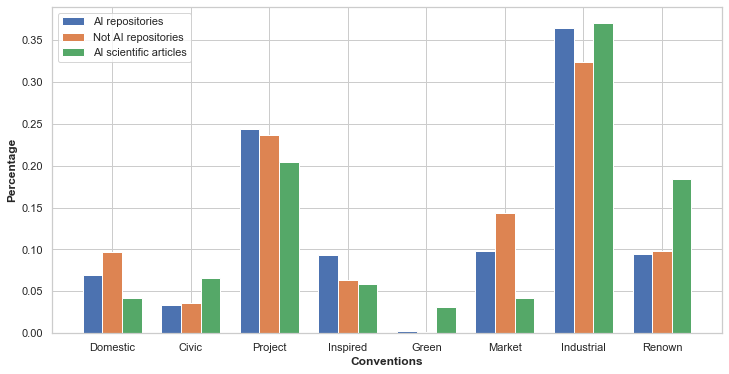

plt.legend([x.replace("training_", "").replace(".txt", "")+" model"
            for x in list(_conventions_matches_precissions.keys())], fontsize=15)



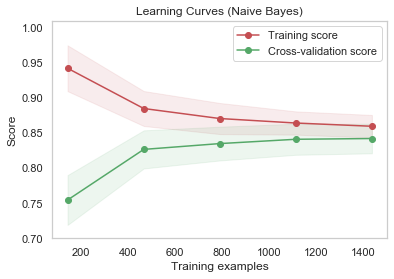

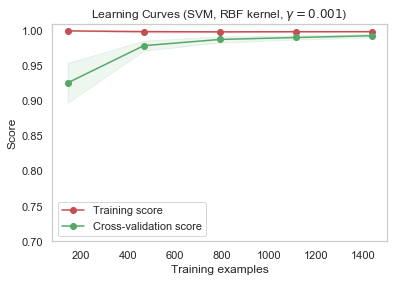

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier

In [21]:
# Function to create model, required for KerasClassifier
def create_model(epochs=20):
    word_index = extended_tokenizer.word_index
    num_epochs = epochs
    EMBEDDING_DIM=100
    MAX_SEQUENCE_LENGTH=32
    
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)


    convs = []
    filter_sizes = [3,4,5]

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in filter_sizes:
        l_conv = Conv1D(nb_filter=128,filter_length=fsz,activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)#

    l_cov1= Conv1D(128, 5, activation='relu')(l_merge)
    l_pool1 = MaxPooling1D(5)(l_cov1)

    l_flat = Flatten()(l_pool1)
    l_dense = Dense(128, activation='relu')(l_flat)
    preds = Dense(2, activation='softmax')(l_dense)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['acc'])
    return model
    
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

In [22]:
np.linspace(.1, 1.0, 2)

array([0.1, 1. ])

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [24]:
training_df['convention'].unique()

array(['domestic', 'civic', 'project', 'inspired', 'green', 'market',
       'industrial', 'renown'], dtype=object)

/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


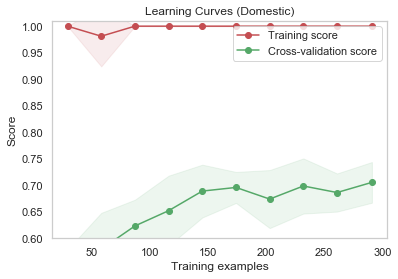

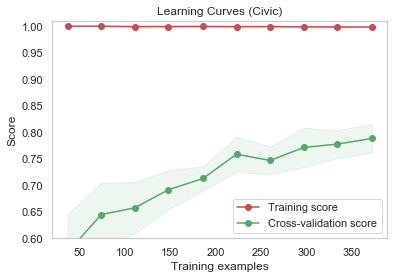

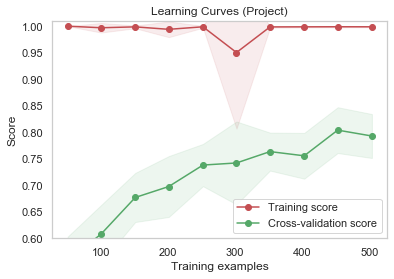

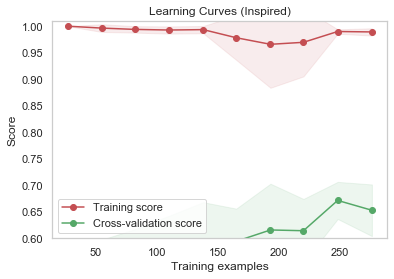

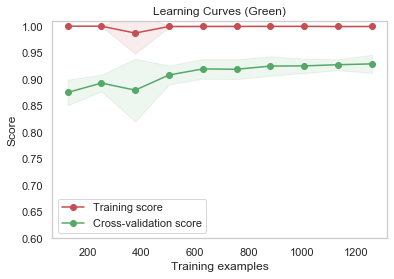

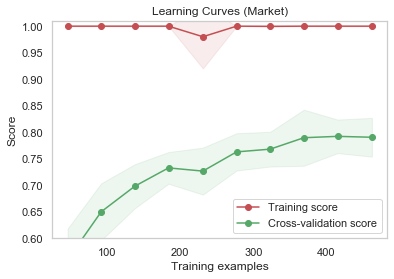

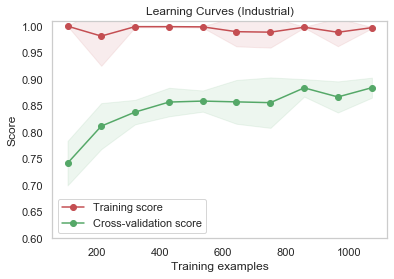

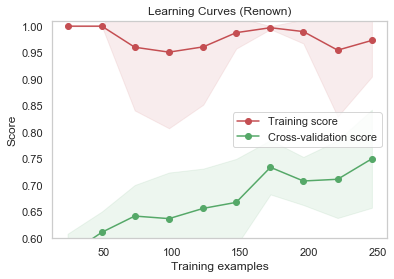

In [25]:
for _conv in training_df['convention'].unique():
    tmp_df_train = training_df[training_df['convention']==_conv]

    texts = tmp_df_train['text'].values
    labels = tmp_df_train['label'].values

    sequences = extended_tokenizer.texts_to_sequences(texts)


    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))

    X=data
    y=labels

    title = "Learning Curves ({})".format(_conv.capitalize())
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
    plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

    plt.show()

In [303]:
data_portions = np.arange(.1, 1.01, 0.10)
print(data_portions)

accs = []

for p in data_portions:
    
    tmp_df_train = training_df[training_df['convention']=='industrial']

    texts = tmp_df_train['text'].values
    labels = tmp_df_train['label'].values

    sequences = extended_tokenizer.texts_to_sequences(texts)


    data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

    labels = to_categorical(np.asarray(labels))
    
    selected_indexes = random.choice(list(enumerate(X)))[0]
    
    tmp_x = data[selected_indexes]
    tmp_y = labels[selected_indexes]
    
    
    
    
    

    title = "Learning Curves (Industrial)"
    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    #cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

    estimator = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
    
    
    estimator.train(tmp_x)

    
    accs.append(metrics.accuracy_score())

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


AttributeError: 'KerasClassifier' object has no attribute 'train'